## 0-0. 디렉터리 설정 및 패키지 불러오기

In [1]:
#디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/EuronData"

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 1. train 데이터 가공

## 1-1. 불필요 행, 열 제거

In [3]:
train = pd.read_csv(path + '/bus_train_all.csv')
test = pd.read_csv(path + '/bus_test_all.csv')

<ipython-input-3-0ad5c7cdae11>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(path + '/bus_train_all.csv')
<ipython-input-3-0ad5c7cdae11>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(path + '/bus_test_all.csv')


In [4]:
#불필요한 행 제거 (야간버스)
train = train[train['교통수단타입명'] != '서울심야버스']

In [5]:
#불필요한 열 제거 (등록일자, 교통수단타입코드, 버스정류장ARS번호, 표준버스정류장ID, 노선명)
train.drop(labels=['등록일자', '교통수단타입코드', '버스정류장ARS번호', '표준버스정류장ID', '노선명',
                   '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수',
                   '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수'],axis=1,inplace=True)

<ipython-input-5-05a36250217e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(labels=['등록일자', '교통수단타입코드', '버스정류장ARS번호', '표준버스정류장ID', '노선명',


## 1-2. 퇴근 시간 정의

In [6]:
#시간별 각 총 승차 인원 기준으로 Bar Chart 생성 위한 데이터 프레임 생성 (데이크루 윤슬 코드 참고했습니다!)
ride_time = ['16시승차총승객수', '17시승차총승객수', '18시승차총승객수', '19시승차총승객수', '20시승차총승객수', '21시승차총승객수']
ridesum=[]
for i in [202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308]:
  ridesum.append(train[train['사용년월']==i][ride_time].sum())
ridesum

[16시승차총승객수     9399919
 17시승차총승객수     9881500
 18시승차총승객수    10963417
 19시승차총승객수     7981364
 20시승차총승객수     5989928
 21시승차총승객수     5646670
 dtype: int64,
 16시승차총승객수     9470350
 17시승차총승객수    10091924
 18시승차총승객수    11065661
 19시승차총승객수     7984332
 20시승차총승객수     6165498
 21시승차총승객수     5847212
 dtype: int64,
 16시승차총승객수     9374410
 17시승차총승객수    10204571
 18시승차총승객수    11336188
 19시승차총승객수     8011482
 20시승차총승객수     6051076
 21시승차총승객수     5773533
 dtype: int64,
 16시승차총승객수     9468265
 17시승차총승객수    10362839
 18시승차총승객수    11349777
 19시승차총승객수     8025800
 20시승차총승객수     6164065
 21시승차총승객수     5959201
 dtype: int64,
 16시승차총승객수     7779863
 17시승차총승객수     8983536
 18시승차총승객수    10340872
 19시승차총승객수     7416564
 20시승차총승객수     5574153
 21시승차총승객수     5278811
 dtype: int64,
 16시승차총승객수     7680665
 17시승차총승객수     8870360
 18시승차총승객수    10289824
 19시승차총승객수     7481177
 20시승차총승객수     5608617
 21시승차총승객수     5306911
 dtype: int64,
 16시승차총승객수     9835076
 17시승차총승객수    10424148
 18시승차총승객수    11648536
 19시승차총승객수   

In [7]:
#ridesum으로 데이터프레임 생성
month_ride=pd.DataFrame(ridesum, columns=ride_time)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*a

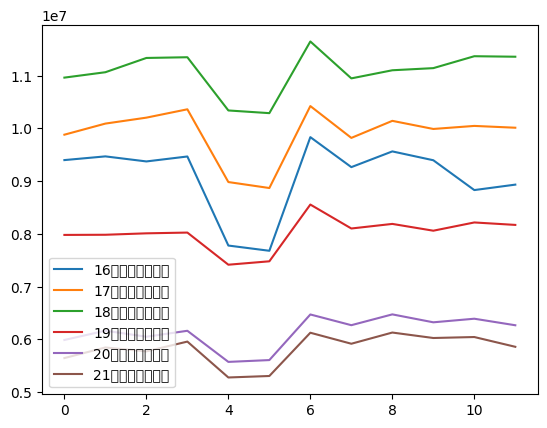

In [8]:
#꺾은선 그래프 생성
month_ride.plot()

<Axes: >

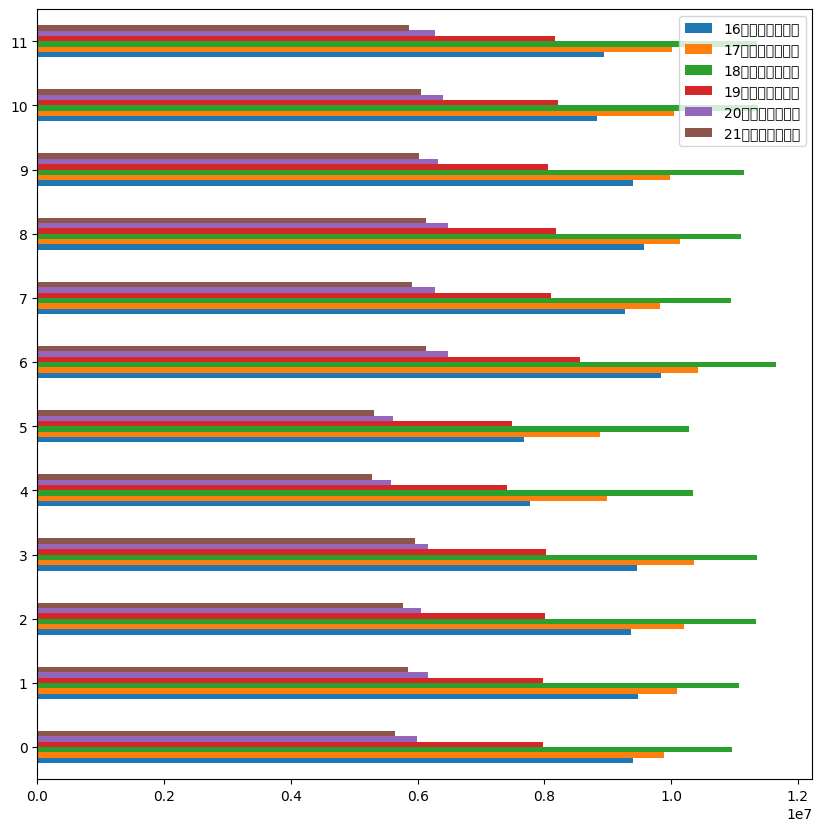

In [9]:
#막대그래프 생성
month_ride.plot(kind='barh', figsize=(10, 10))

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*a

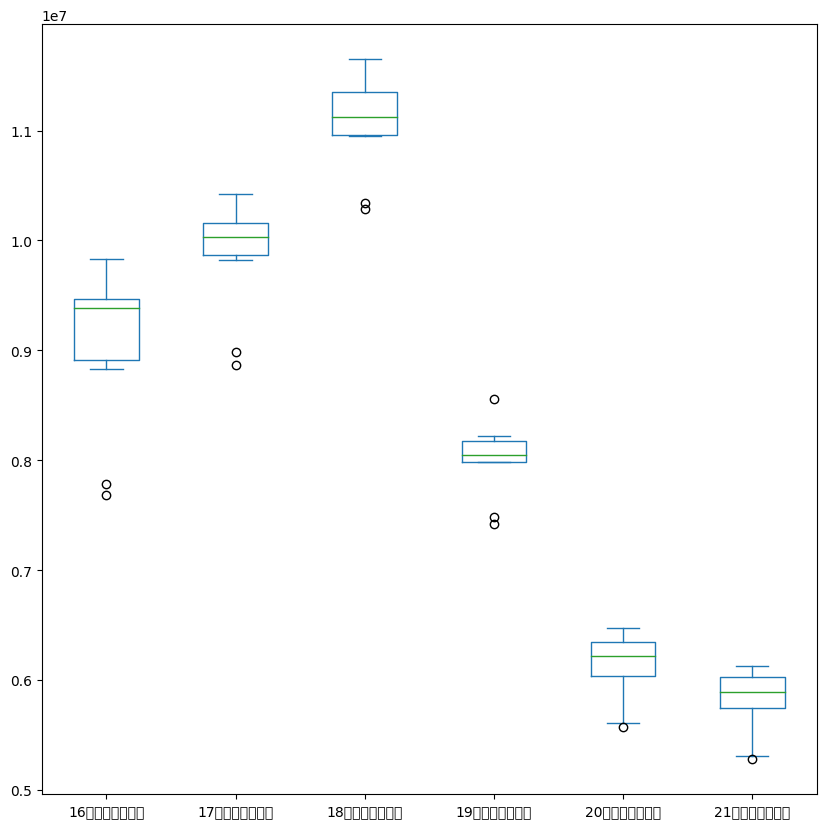

In [10]:
#박스 플롯 생성
month_ride.plot(kind='box', figsize=(10, 10))

따라서 결론적으로 17:00-19:00 시가 퇴근 시간이라고 정의를 내렸다!

## 1-3. 새로운 칼럼 정의

In [11]:
train

,사용년월,노선번호,역명,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,202209,741,종로2가사거리(00077),139,95,515,259,379,300,430,...,555,416,627,342,389,301,194,263,179,서울간선버스
1,202209,470,종로2가사거리(00067),163,79,625,246,607,380,658,...,540,407,517,360,386,327,185,342,169,서울간선버스
4,202209,100,창경궁.서울대학교병원(00031),76,263,151,445,415,694,262,...,93,223,86,151,60,235,23,55,36,서울간선버스
5,202209,107,창경궁.서울대학교병원(00058),29,149,60,504,104,705,67,...,44,88,37,42,25,24,18,12,12,서울간선버스
6,202209,104,창경궁.서울대학교병원(00024),127,383,249,681,396,1053,363,...,120,246,83,147,65,194,51,57,65,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,서울간선버스
498172,202308,9404,구미동차고지(기점가상)(00001),1,5,1,2,1,0,1,...,3,2,0,0,0,1,2,2,3,서울광역버스
498173,202308,9404,구미동차고지(종점가상)(00060),0,1,0,0,0,3,0,...,1,0,3,0,5,0,3,0,0,서울광역버스
498174,202308,9707,가좌동종점(종점가상)(00078),0,0,0,2,0,8,0,...,3,0,6,0,3,0,4,0,3,서울광역버스


In [12]:
train['역명'].str[-6:-1]

0         00077
1         00067
4         00031
5         00058
6         00024
          ...  
498171    00081
498172    00001
498173    00060
498174    00078
498175    00127
Name: 역명, Length: 450530, dtype: object

In [13]:
#역명 뒤 다섯자리 코드 칼럼 정의(bus_station_id)
train.insert(3, 'bus_station_id', train['역명'].str[-6:-1])
train

,사용년월,노선번호,역명,bus_station_id,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,202209,741,종로2가사거리(00077),00077,139,95,515,259,379,300,...,555,416,627,342,389,301,194,263,179,서울간선버스
1,202209,470,종로2가사거리(00067),00067,163,79,625,246,607,380,...,540,407,517,360,386,327,185,342,169,서울간선버스
4,202209,100,창경궁.서울대학교병원(00031),00031,76,263,151,445,415,694,...,93,223,86,151,60,235,23,55,36,서울간선버스
5,202209,107,창경궁.서울대학교병원(00058),00058,29,149,60,504,104,705,...,44,88,37,42,25,24,18,12,12,서울간선버스
6,202209,104,창경궁.서울대학교병원(00024),00024,127,383,249,681,396,1053,...,120,246,83,147,65,194,51,57,65,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,서울간선버스
498172,202308,9404,구미동차고지(기점가상)(00001),00001,1,5,1,2,1,0,...,3,2,0,0,0,1,2,2,3,서울광역버스
498173,202308,9404,구미동차고지(종점가상)(00060),00060,0,1,0,0,0,3,...,1,0,3,0,5,0,3,0,0,서울광역버스
498174,202308,9707,가좌동종점(종점가상)(00078),00078,0,0,0,2,0,8,...,3,0,6,0,3,0,4,0,3,서울광역버스


In [14]:
before = []
for i in range(6, 22):
  before.append(str(i) + '시승차총승객수')
  before.append(str(i) + '시하차총승객수')
after = []
for i in range(6, 22):
  after.append(str(i) +'~' + str(i+1) + '_ride')
  after.append(str(i) +'~' + str(i+1) + '_takeoff')
rename_dict = dict(zip(before, after))

In [15]:
rename_dict

{'6시승차총승객수': '6~7_ride',
 '6시하차총승객수': '6~7_takeoff',
 '7시승차총승객수': '7~8_ride',
 '7시하차총승객수': '7~8_takeoff',
 '8시승차총승객수': '8~9_ride',
 '8시하차총승객수': '8~9_takeoff',
 '9시승차총승객수': '9~10_ride',
 '9시하차총승객수': '9~10_takeoff',
 '10시승차총승객수': '10~11_ride',
 '10시하차총승객수': '10~11_takeoff',
 '11시승차총승객수': '11~12_ride',
 '11시하차총승객수': '11~12_takeoff',
 '12시승차총승객수': '12~13_ride',
 '12시하차총승객수': '12~13_takeoff',
 '13시승차총승객수': '13~14_ride',
 '13시하차총승객수': '13~14_takeoff',
 '14시승차총승객수': '14~15_ride',
 '14시하차총승객수': '14~15_takeoff',
 '15시승차총승객수': '15~16_ride',
 '15시하차총승객수': '15~16_takeoff',
 '16시승차총승객수': '16~17_ride',
 '16시하차총승객수': '16~17_takeoff',
 '17시승차총승객수': '17~18_ride',
 '17시하차총승객수': '17~18_takeoff',
 '18시승차총승객수': '18~19_ride',
 '18시하차총승객수': '18~19_takeoff',
 '19시승차총승객수': '19~20_ride',
 '19시하차총승객수': '19~20_takeoff',
 '20시승차총승객수': '20~21_ride',
 '20시하차총승객수': '20~21_takeoff',
 '21시승차총승객수': '21~22_ride',
 '21시하차총승객수': '21~22_takeoff'}

In [16]:
#칼럼명 영어로 새로 정의
#id (데이터 고유값) <- ?? 제가 보고서에 이렇게 적었는데 대체 이게 뭘까요 제가 잘못 적은 것 같습니다. 우선 안만들었습니다.
#month(월 단위), bus_station_id(역명 뒤 다섯자리), bus_id(노선 번호), station_name(역명)
#X~Y ride(1시간 단위 승차 총 승객 수), X~Y takeoff(1시간 단위 하차 총 승객 수), 18~20 ride(퇴근 시간 승차 총 승객 수), bus_type(교통 수단 타입명)
train.rename(columns = {'사용년월':'month', '노선번호':'bus_id', '역명':'station_name', '교통수단타입명':'bus_type'}, inplace = True)
train.rename(columns = rename_dict, inplace = True)
train

,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,bus_type
0,202209,741,종로2가사거리(00077),00077,139,95,515,259,379,300,...,555,416,627,342,389,301,194,263,179,서울간선버스
1,202209,470,종로2가사거리(00067),00067,163,79,625,246,607,380,...,540,407,517,360,386,327,185,342,169,서울간선버스
4,202209,100,창경궁.서울대학교병원(00031),00031,76,263,151,445,415,694,...,93,223,86,151,60,235,23,55,36,서울간선버스
5,202209,107,창경궁.서울대학교병원(00058),00058,29,149,60,504,104,705,...,44,88,37,42,25,24,18,12,12,서울간선버스
6,202209,104,창경궁.서울대학교병원(00024),00024,127,383,249,681,396,1053,...,120,246,83,147,65,194,51,57,65,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,서울간선버스
498172,202308,9404,구미동차고지(기점가상)(00001),00001,1,5,1,2,1,0,...,3,2,0,0,0,1,2,2,3,서울광역버스
498173,202308,9404,구미동차고지(종점가상)(00060),00060,0,1,0,0,0,3,...,1,0,3,0,5,0,3,0,0,서울광역버스
498174,202308,9707,가좌동종점(종점가상)(00078),00078,0,0,0,2,0,8,...,3,0,6,0,3,0,4,0,3,서울광역버스


In [17]:
#두 시간 단위로 칼럼 통합
for i in range(3, 11):
  train[str(i*2) + '~' + str(i*2 + 2) + '_ride'] = train[str(i*2) + '~' + str(i*2 + 1) + '_ride'] + train[str(i*2 + 1) + '~' + str(i*2 + 2) + '_ride']
  train[str(i*2) + '~' + str(i*2 + 2) + '_takeoff'] = train[str(i*2) + '~' + str(i*2 + 1) + '_takeoff'] + train[str(i*2 + 1) + '~' + str(i*2 + 2) + '_takeoff']
train

,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
0,202209,741,종로2가사거리(00077),00077,139,95,515,259,379,300,...,574,800,643,763,651,991,758,1016,564,373
1,202209,470,종로2가사거리(00067),00067,163,79,625,246,607,380,...,1074,982,839,803,731,950,767,903,669,354
4,202209,100,창경궁.서울대학교병원(00031),00031,76,263,151,445,415,694,...,193,450,381,353,558,209,374,146,290,59
5,202209,107,창경궁.서울대학교병원(00058),00058,29,149,60,504,104,705,...,76,232,92,159,96,92,130,62,36,30
6,202209,104,창경궁.서울대학교병원(00024),00024,127,383,249,681,396,1053,...,312,460,344,451,464,228,393,148,251,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
498172,202308,9404,구미동차고지(기점가상)(00001),00001,1,5,1,2,1,0,...,1,1,1,1,1,3,2,0,3,5
498173,202308,9404,구미동차고지(종점가상)(00060),00060,0,1,0,0,0,3,...,0,2,0,5,0,3,0,8,0,3
498174,202308,9707,가좌동종점(종점가상)(00078),00078,0,0,0,2,0,8,...,0,7,0,2,0,11,0,9,0,7


In [18]:
train.columns

Index(['month', 'bus_id', 'station_name', 'bus_station_id', '6~7_ride',
       '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride', '8~9_takeoff',
       '9~10_ride', '9~10_takeoff', '10~11_ride', '10~11_takeoff',
       '11~12_ride', '11~12_takeoff', '12~13_ride', '12~13_takeoff',
       '13~14_ride', '13~14_takeoff', '14~15_ride', '14~15_takeoff',
       '15~16_ride', '15~16_takeoff', '16~17_ride', '16~17_takeoff',
       '17~18_ride', '17~18_takeoff', '18~19_ride', '18~19_takeoff',
       '19~20_ride', '19~20_takeoff', '20~21_ride', '20~21_takeoff',
       '21~22_ride', '21~22_takeoff', 'bus_type', '6~8_ride', '6~8_takeoff',
       '8~10_ride', '8~10_takeoff', '10~12_ride', '10~12_takeoff',
       '12~14_ride', '12~14_takeoff', '14~16_ride', '14~16_takeoff',
       '16~18_ride', '16~18_takeoff', '18~20_ride', '18~20_takeoff',
       '20~22_ride', '20~22_takeoff'],
      dtype='object')

In [19]:
train.drop(labels=['6~7_ride',
       '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride', '8~9_takeoff',
       '9~10_ride', '9~10_takeoff', '10~11_ride', '10~11_takeoff',
       '11~12_ride', '11~12_takeoff', '12~13_ride', '12~13_takeoff',
       '13~14_ride', '13~14_takeoff', '14~15_ride', '14~15_takeoff',
       '15~16_ride', '15~16_takeoff', '16~17_ride', '16~17_takeoff',
       '17~18_ride', '17~18_takeoff', '18~19_ride', '18~19_takeoff',
       '19~20_ride', '19~20_takeoff', '20~21_ride', '20~21_takeoff',
       '21~22_ride', '21~22_takeoff',],axis=1,inplace=True)
train

,month,bus_id,station_name,bus_station_id,bus_type,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
0,202209,741,종로2가사거리(00077),00077,서울간선버스,654,354,809,753,576,...,574,800,643,763,651,991,758,1016,564,373
1,202209,470,종로2가사거리(00067),00067,서울간선버스,788,325,1265,782,1217,...,1074,982,839,803,731,950,767,903,669,354
4,202209,100,창경궁.서울대학교병원(00031),00031,서울간선버스,227,708,677,1114,282,...,193,450,381,353,558,209,374,146,290,59
5,202209,107,창경궁.서울대학교병원(00058),00058,서울간선버스,89,653,171,1070,101,...,76,232,92,159,96,92,130,62,36,30
6,202209,104,창경궁.서울대학교병원(00024),00024,서울간선버스,376,1064,759,1765,381,...,312,460,344,451,464,228,393,148,251,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,서울간선버스,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
498172,202308,9404,구미동차고지(기점가상)(00001),00001,서울광역버스,2,7,2,0,0,...,1,1,1,1,1,3,2,0,3,5
498173,202308,9404,구미동차고지(종점가상)(00060),00060,서울광역버스,0,1,0,3,0,...,0,2,0,5,0,3,0,8,0,3
498174,202308,9707,가좌동종점(종점가상)(00078),00078,서울광역버스,0,2,0,11,0,...,0,7,0,2,0,11,0,9,0,7


# 2. test 데이터 가공

위의 train과 같은 과정을 test에 반복함.

In [20]:
#불필요한 행 제거 (야간버스)
test = test[test['교통수단타입명'] != '서울심야버스']
#불필요한 열 제거 (등록일자, 교통수단타입코드, 버스정류장ARS번호, 표준버스정류장ID, 노선명)
test.drop(labels=['등록일자', '교통수단타입코드', '버스정류장ARS번호', '표준버스정류장ID', '노선명',
                   '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수',
                   '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수'],axis=1,inplace=True)
#역명 뒤 다섯자리 코드 칼럼 정의(bus_station_id)
test.insert(3, 'bus_station_id', test['역명'].str[-6:-1])
#칼럼명 영어로 새로 정의
#id (데이터 고유값) <- ?? 제가 보고서에 이렇게 적었는데 대체 이게 뭘까요 제가 잘못 적은 것 같습니다. 우선 안만들었습니다.
#month(월 단위), bus_station_id(역명 뒤 다섯자리), bus_id(노선 번호), station_name(역명)
#X~Y ride(1시간 단위 승차 총 승객 수), X~Y takeoff(1시간 단위 하차 총 승객 수), 18~20 ride(퇴근 시간 승차 총 승객 수), bus_type(교통 수단 타입명)
test.rename(columns = {'사용년월':'month', '노선번호':'bus_id', '역명':'station_name', '교통수단타입명':'bus_type'}, inplace = True)
test.rename(columns = rename_dict, inplace = True)
test

<ipython-input-20-3eebacc3e933>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=['등록일자', '교통수단타입코드', '버스정류장ARS번호', '표준버스정류장ID', '노선명',
<ipython-input-20-3eebacc3e933>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns = {'사용년월':'month', '노선번호':'bus_id', '역명':'station_name', '교통수단타입명':'bus_type'}, inplace = True)
<ipython-input-20-3eebacc3e933>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.r

,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,bus_type
1,202309,470,종로2가사거리(00066),00066,201,66,498,283,662,346,...,524,377,581,343,447,378,221,419,260,서울간선버스
3,202309,741,종로2가사거리(00075),00075,127,77,397,281,392,356,...,523,441,688,426,512,292,279,303,231,서울간선버스
4,202309,100,창경궁.서울대학교병원(00031),00031,100,243,158,438,281,560,...,80,218,67,147,36,152,26,77,31,서울간선버스
6,202309,104,창경궁.서울대학교병원(00024),00024,100,368,195,585,406,918,...,61,313,82,210,56,248,41,50,66,서울간선버스
8,202309,171,창경궁.서울대학교병원(00012),00012,150,252,428,547,515,1114,...,113,407,84,193,55,265,28,172,41,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125571,202311,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,서울간선버스
125572,202311,9404,구미동차고지(기점가상)(00001),00001,3,5,0,2,1,1,...,1,2,2,2,3,0,3,0,0,서울광역버스
125573,202311,9404,구미동차고지(종점가상)(00060),00060,0,3,0,2,0,0,...,0,0,2,0,3,0,1,0,6,서울광역버스
125574,202311,9701,가좌동종점(종점가상)(00127),00127,0,0,0,0,0,17,...,3,0,3,0,2,0,0,0,1,서울광역버스


In [21]:
#두 시간 단위로 칼럼 통합
for i in range(3, 11):
  test[str(i*2) + '~' + str(i*2 + 2) + '_ride'] = test[str(i*2) + '~' + str(i*2 + 1) + '_ride'] + test[str(i*2 + 1) + '~' + str(i*2 + 2) + '_ride']
  test[str(i*2) + '~' + str(i*2 + 2) + '_takeoff'] = test[str(i*2) + '~' + str(i*2 + 1) + '_takeoff'] + test[str(i*2 + 1) + '~' + str(i*2 + 2) + '_takeoff']
test

<ipython-input-21-c79527b48873>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[str(i*2) + '~' + str(i*2 + 2) + '_ride'] = test[str(i*2) + '~' + str(i*2 + 1) + '_ride'] + test[str(i*2 + 1) + '~' + str(i*2 + 2) + '_ride']
<ipython-input-21-c79527b48873>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[str(i*2) + '~' + str(i*2 + 2) + '_takeoff'] = test[str(i*2) + '~' + str(i*2 + 1) + '_takeoff'] + test[str(i*2 + 1) + '~' + str(i*2 + 2) + '_takeoff']
<ipython-input-21-c79527b48873>:3: SettingWithCop

,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
1,202309,470,종로2가사거리(00066),00066,201,66,498,283,662,346,...,988,882,744,833,672,989,720,1028,797,481
3,202309,741,종로2가사거리(00075),00075,127,77,397,281,392,356,...,627,868,613,859,659,968,867,1200,595,510
4,202309,100,창경궁.서울대학교병원(00031),00031,100,243,158,438,281,560,...,256,366,334,358,482,186,365,103,229,57
6,202309,104,창경궁.서울대학교병원(00024),00024,100,368,195,585,406,918,...,439,471,452,388,595,161,523,138,298,107
8,202309,171,창경궁.서울대학교병원(00012),00012,150,252,428,547,515,1114,...,518,361,636,269,992,241,600,139,437,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125571,202311,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
125572,202311,9404,구미동차고지(기점가상)(00001),00001,3,5,0,2,1,1,...,5,2,1,0,2,2,4,5,0,3
125573,202311,9404,구미동차고지(종점가상)(00060),00060,0,3,0,2,0,0,...,0,0,0,3,0,3,0,5,0,7
125574,202311,9701,가좌동종점(종점가상)(00127),00127,0,0,0,0,0,17,...,0,2,0,3,0,6,0,5,0,1


In [22]:
test.drop(labels=['6~7_ride',
       '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride', '8~9_takeoff',
       '9~10_ride', '9~10_takeoff', '10~11_ride', '10~11_takeoff',
       '11~12_ride', '11~12_takeoff', '12~13_ride', '12~13_takeoff',
       '13~14_ride', '13~14_takeoff', '14~15_ride', '14~15_takeoff',
       '15~16_ride', '15~16_takeoff', '16~17_ride', '16~17_takeoff',
       '17~18_ride', '17~18_takeoff', '18~19_ride', '18~19_takeoff',
       '19~20_ride', '19~20_takeoff', '20~21_ride', '20~21_takeoff',
       '21~22_ride', '21~22_takeoff',],axis=1,inplace=True)
test

,month,bus_id,station_name,bus_station_id,bus_type,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
1,202309,470,종로2가사거리(00066),00066,서울간선버스,699,349,1292,716,1191,...,988,882,744,833,672,989,720,1028,797,481
3,202309,741,종로2가사거리(00075),00075,서울간선버스,524,358,838,816,588,...,627,868,613,859,659,968,867,1200,595,510
4,202309,100,창경궁.서울대학교병원(00031),00031,서울간선버스,258,681,546,977,313,...,256,366,334,358,482,186,365,103,229,57
6,202309,104,창경궁.서울대학교병원(00024),00024,서울간선버스,295,953,689,1377,420,...,439,471,452,388,595,161,523,138,298,107
8,202309,171,창경궁.서울대학교병원(00012),00012,서울간선버스,578,799,911,1682,651,...,518,361,636,269,992,241,600,139,437,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125571,202311,672,김포교통(종점가상)(00081),00081,서울간선버스,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
125572,202311,9404,구미동차고지(기점가상)(00001),00001,서울광역버스,3,7,2,1,3,...,5,2,1,0,2,2,4,5,0,3
125573,202311,9404,구미동차고지(종점가상)(00060),00060,서울광역버스,0,5,0,1,0,...,0,0,0,3,0,3,0,5,0,7
125574,202311,9701,가좌동종점(종점가상)(00127),00127,서울광역버스,0,0,0,19,0,...,0,2,0,3,0,6,0,5,0,1


# 3. 날씨 데이터 가공

## 3-0. 데이터 불러오기

In [23]:
weather_temp = pd.read_csv(path + '/extremum_20240124022608.csv', skiprows = 11, encoding='cp949')
weather_temp

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,108,서울,2022-01,-2.2,2.6,8.4,2022-01-24,-6.2,-11.3,2022-01-12
1,108,서울,2022-02,-1.1,3.8,11.5,2022-02-28,-5.3,-10.7,2022-02-17
2,108,서울,2022-03,7.7,12.7,19.5,2022-03-12,3.2,-3.0,2022-03-06
3,108,서울,2022-04,14.8,20.6,28.7,2022-04-26,10.0,3.5,2022-04-03
4,108,서울,2022-05,19.1,25.0,30.7,2022-05-23,13.9,7.9,2022-05-01
5,108,서울,2022-06,23.3,27.5,32.7,2022-06-11,19.8,14.9,2022-06-15
6,108,서울,2022-07,27.3,31.0,36.1,2022-07-30,24.2,20.8,2022-07-21
7,108,서울,2022-08,25.7,28.9,32.9,2022-08-04,23.1,16.1,2022-08-28
8,108,서울,2022-09,22.4,27.2,32.5,2022-09-18,18.2,12.3,2022-09-24
9,108,서울,2022-10,14.6,19.7,27.6,2022-10-01,10.3,4.4,2022-10-19


In [24]:
weather_rain = pd.read_csv(path + '/extremum_20240124165040.csv', skiprows = 12, encoding='cp949')
weather_rain

,\t지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Unnamed: 8
0,108,서울,2022-01,5.5,1.7,2022-01-19,NaN,NaN,NaN
1,108,서울,2022-02,4.7,1.7,2022-02-14,NaN,NaN,NaN
2,108,서울,2022-03,102.6,42.1,2022-03-13,NaN,NaN,NaN
3,108,서울,2022-04,20.4,15.5,2022-04-29,4.0,2022-04-29,NaN
4,108,서울,2022-05,7.5,3.5,2022-05-25,2.9,2022-05-25,NaN
5,108,서울,2022-06,393.8,176.2,2022-06-30,34.4,2022-06-23,NaN
6,108,서울,2022-07,252.3,114.5,2022-07-13,33.8,2022-07-16,NaN
7,108,서울,2022-08,564.8,129.6,2022-08-08,47.1,2022-08-19,NaN
8,108,서울,2022-09,201.5,120.0,2022-09-05,12.8,2022-09-05,NaN
9,108,서울,2022-10,124.1,76.0,2022-10-03,14.7,2022-10-03,NaN


## 3-1. 불필요 칼럼 제거 및 정리

In [25]:
#기온 데이터
#merge로 병합할 것을 대비, 같은 날짜 형식으로 바꾸는 과정 필요
weather_temp = weather_temp.rename(columns = {'일시':'사용년월'})
for i in range(24):
  weather_temp.loc[i, '사용년월'] = str(weather_temp.loc[i, '사용년월'][:4])+str(weather_temp.loc[i, '사용년월'][5:])
#불필요한 칼럼 제거
weather_temp.drop(labels=['\t\t지점번호','지점명', '\t최고기온일자', '최저기온일자', '평균최고기온(℃)',	'최고기온(℃)',	'평균최저기온(℃)',	'최저기온(℃)'],axis=1,inplace=True)
weather_temp

,사용년월,평균기온(℃)
0,202201,-2.2
1,202202,-1.1
2,202203,7.7
3,202204,14.8
4,202205,19.1
5,202206,23.3
6,202207,27.3
7,202208,25.7
8,202209,22.4
9,202210,14.6


In [26]:
#강수량 데이터
#merge로 병합할 것을 대비, 같은 날짜 형식으로 바꾸는 과정 필요
weather_rain = weather_rain.rename(columns = {'일시':'사용년월'})
for i in range(24):
  weather_rain.loc[i, '사용년월'] = str(weather_rain.loc[i, '사용년월'][:4])+str(weather_rain.loc[i, '사용년월'][5:])
#불필요한 칼럼 제거
weather_rain.drop(labels=['\t지점번호','지점명', '일최다강수량일자', '1시간최다강수량(mm)', '1시간최다강수량일자', 'Unnamed: 8', '일최다강수량(mm)'],axis=1,inplace=True)
weather_rain

,사용년월,강수량(mm)
0,202201,5.5
1,202202,4.7
2,202203,102.6
3,202204,20.4
4,202205,7.5
5,202206,393.8
6,202207,252.3
7,202208,564.8
8,202209,201.5
9,202210,124.1


In [27]:
#merge 이전 데이터 타입 변환
weather_temp['사용년월'] = weather_temp['사용년월'].astype(int)
weather_rain['사용년월'] = weather_rain['사용년월'].astype(int)

In [28]:
weather_temp.rename(columns = {'사용년월':'month', '평균기온(℃)':'avg_temp'}, inplace = True)
weather_rain.rename(columns = {'사용년월':'month', '강수량(mm)':'rain'}, inplace = True)

## 3-2. merge로 데이터 병합

In [29]:
train_weather = pd.merge(train,weather_temp, how='inner',on='month')
train_weather = pd.merge(train_weather,weather_rain, how='inner',on='month')
train_weather

,month,bus_id,station_name,bus_station_id,bus_type,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,...,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff,avg_temp,rain
0,202209,741,종로2가사거리(00077),00077,서울간선버스,654,354,809,753,576,...,643,763,651,991,758,1016,564,373,22.4,201.5
1,202209,470,종로2가사거리(00067),00067,서울간선버스,788,325,1265,782,1217,...,839,803,731,950,767,903,669,354,22.4,201.5
2,202209,100,창경궁.서울대학교병원(00031),00031,서울간선버스,227,708,677,1114,282,...,381,353,558,209,374,146,290,59,22.4,201.5
3,202209,107,창경궁.서울대학교병원(00058),00058,서울간선버스,89,653,171,1070,101,...,92,159,96,92,130,62,36,30,22.4,201.5
4,202209,104,창경궁.서울대학교병원(00024),00024,서울간선버스,376,1064,759,1765,381,...,344,451,464,228,393,148,251,116,22.4,201.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450525,202308,672,김포교통(종점가상)(00081),00081,서울간선버스,0,0,0,1,0,...,0,0,0,1,0,0,0,0,27.2,298.1
450526,202308,9404,구미동차고지(기점가상)(00001),00001,서울광역버스,2,7,2,0,0,...,1,1,1,3,2,0,3,5,27.2,298.1
450527,202308,9404,구미동차고지(종점가상)(00060),00060,서울광역버스,0,1,0,3,0,...,0,5,0,3,0,8,0,3,27.2,298.1
450528,202308,9707,가좌동종점(종점가상)(00078),00078,서울광역버스,0,2,0,11,0,...,0,2,0,11,0,9,0,7,27.2,298.1


# 4. EDA

## 4-1. 승차 칼럼별 분포

In [30]:
columns = train.columns

In [31]:
columns

Index(['month', 'bus_id', 'station_name', 'bus_station_id', 'bus_type',
       '6~8_ride', '6~8_takeoff', '8~10_ride', '8~10_takeoff', '10~12_ride',
       '10~12_takeoff', '12~14_ride', '12~14_takeoff', '14~16_ride',
       '14~16_takeoff', '16~18_ride', '16~18_takeoff', '18~20_ride',
       '18~20_takeoff', '20~22_ride', '20~22_takeoff'],
      dtype='object')

<ipython-input-32-b256b15736a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train[i])
<ipython-input-32-b256b15736a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train[i])
<ipython-input-32-b256b15736a6>:3: UserWarning: 

`distplot` is a deprecated function and will be remove

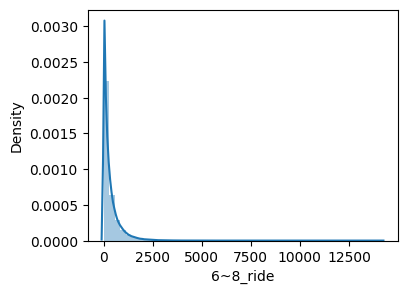

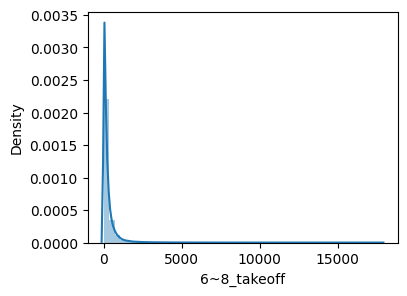

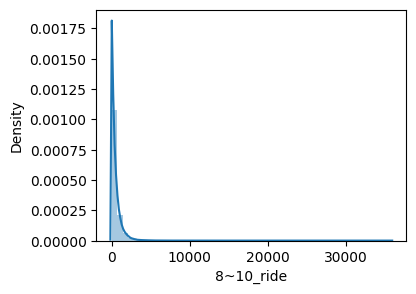

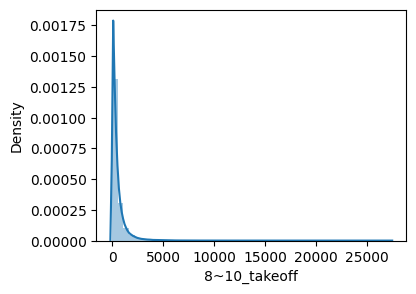

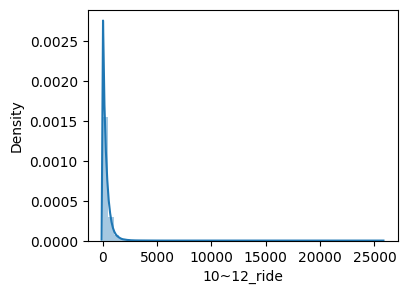

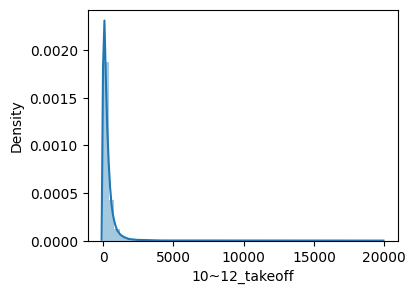

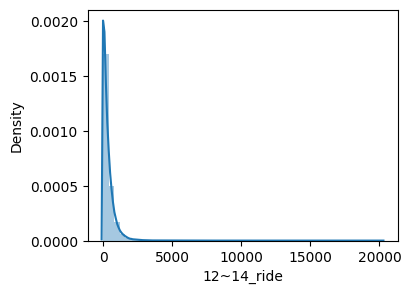

In [32]:
for i in columns[5:12]:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.distplot(train[i])

## 4-2. 상관계수로 날씨 데이터가 유의한 지 확인.

<ipython-input-33-a00c5cb2645a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=round(train_weather.corr(),3)


<Axes: >

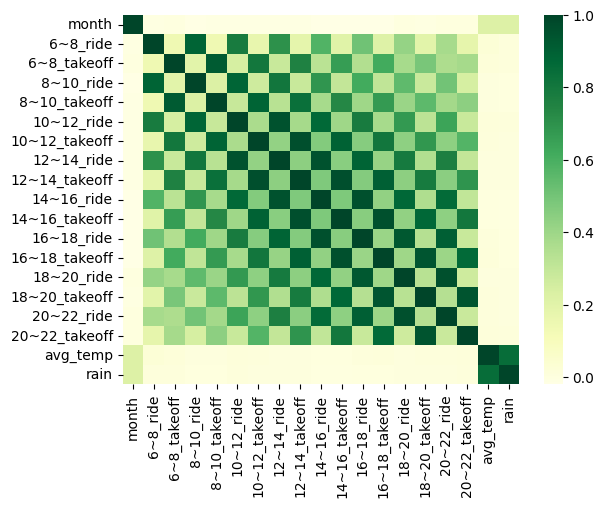

In [33]:
#상관계수 히트맵 생성
corr_df=round(train_weather.corr(),3)
sns.heatmap(corr_df, annot=False, cmap='YlGn')

## 4-3. 날씨 데이터 칼럼 정리 후 상관관계 확인.

In [34]:
col_list = ['6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride', '16~18_ride', '18~20_ride', '20~22_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff',
            '12~14_takeoff', '14~16_takeoff', '16~18_takeoff', '18~20_takeoff', '20~22_takeoff']

In [35]:
train_corr = train.groupby('month').sum()
train_corr['ride'] = 0
train_corr['takeoff'] = 0
for i in col_list:
  if i[-4:] == 'ride':
    train_corr['ride'] = train_corr['ride'] + train_corr[i]
  else:
    train_corr['takeoff'] = train_corr['takeoff'] + train_corr[i]
train_corr

<ipython-input-35-08840b370de9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_corr = train.groupby('month').sum()


,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,10~12_takeoff,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff,ride,takeoff
month,,,,,,,,,,,,,,,,,,
202209,12885939,10742305,18825818,19431198,12135102,11995641,13461626,12996782,14999452,14283045,19281419,18277169,18944781,19359958,11636598,11594079,122170735,118680177
202210,12714410,10662451,19180101,19664436,12880752,12700687,14279522,13782804,15548238,14849258,19562274,18578847,19049993,19507300,12012710,11920055,125228000,121665838
202211,13099770,10934089,20048740,20646721,12411515,12307281,13724317,13249503,15146297,14453898,19578981,18481317,19347670,19901615,11824609,11764614,125181899,121739038
202212,12681364,10617548,19859368,20391745,12817341,12620422,14315403,13800621,16024254,15321613,19831104,18814170,19375577,19921196,12123266,12009576,127027677,123496891
202301,10658741,9026476,17297147,17687679,11189853,11028785,12904241,12439333,13764245,13276235,16763399,15918074,17757436,18106131,10852964,10811798,111188026,108294511
202302,10746618,9085685,17250809,17668062,11277109,11109397,12777704,12324540,13523459,13042395,16551025,15709386,17771001,18094723,10915528,10879989,110813253,107914177
202303,14124573,11818317,20155269,20897389,12567099,12484141,13740434,13292132,15569712,14856207,20259224,19242905,20205514,20626790,12600351,12534596,129222176,125752477
202304,13127267,11024850,18981794,19564046,12416167,12288159,13629816,13181594,14927986,14275913,19087158,18146938,19052179,19419446,12188570,12115747,123410937,120016693
202305,13317736,11265014,19178026,19719304,12824328,12672806,14117919,13657136,15426457,14753414,19708497,18713714,19292855,19696842,12605722,12499812,126471540,122978042


In [36]:
train_corr.columns

Index(['6~8_ride', '6~8_takeoff', '8~10_ride', '8~10_takeoff', '10~12_ride',
       '10~12_takeoff', '12~14_ride', '12~14_takeoff', '14~16_ride',
       '14~16_takeoff', '16~18_ride', '16~18_takeoff', '18~20_ride',
       '18~20_takeoff', '20~22_ride', '20~22_takeoff', 'ride', 'takeoff'],
      dtype='object')

In [37]:
train_corr = train_corr.reset_index()
train_corr

,month,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,10~12_takeoff,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff,ride,takeoff
0,202209,12885939,10742305,18825818,19431198,12135102,11995641,13461626,12996782,14999452,14283045,19281419,18277169,18944781,19359958,11636598,11594079,122170735,118680177
1,202210,12714410,10662451,19180101,19664436,12880752,12700687,14279522,13782804,15548238,14849258,19562274,18578847,19049993,19507300,12012710,11920055,125228000,121665838
2,202211,13099770,10934089,20048740,20646721,12411515,12307281,13724317,13249503,15146297,14453898,19578981,18481317,19347670,19901615,11824609,11764614,125181899,121739038
3,202212,12681364,10617548,19859368,20391745,12817341,12620422,14315403,13800621,16024254,15321613,19831104,18814170,19375577,19921196,12123266,12009576,127027677,123496891
4,202301,10658741,9026476,17297147,17687679,11189853,11028785,12904241,12439333,13764245,13276235,16763399,15918074,17757436,18106131,10852964,10811798,111188026,108294511
5,202302,10746618,9085685,17250809,17668062,11277109,11109397,12777704,12324540,13523459,13042395,16551025,15709386,17771001,18094723,10915528,10879989,110813253,107914177
6,202303,14124573,11818317,20155269,20897389,12567099,12484141,13740434,13292132,15569712,14856207,20259224,19242905,20205514,20626790,12600351,12534596,129222176,125752477
7,202304,13127267,11024850,18981794,19564046,12416167,12288159,13629816,13181594,14927986,14275913,19087158,18146938,19052179,19419446,12188570,12115747,123410937,120016693
8,202305,13317736,11265014,19178026,19719304,12824328,12672806,14117919,13657136,15426457,14753414,19708497,18713714,19292855,19696842,12605722,12499812,126471540,122978042
9,202306,13342321,11275054,19069623,19665852,12492309,12339421,13794509,13358744,15201664,14528119,19387012,18412574,19204492,19612604,12351851,12215040,124843781,121407408


In [38]:
train_corr['month'] = train_corr['month'].astype(int)

In [39]:
train_corr = pd.merge(train_corr,weather_temp, how='inner',on='month')
train_corr = pd.merge(train_corr,weather_rain, how='inner',on='month')
train_corr

,month,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,10~12_takeoff,12~14_ride,12~14_takeoff,14~16_ride,...,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff,ride,takeoff,avg_temp,rain
0,202209,12885939,10742305,18825818,19431198,12135102,11995641,13461626,12996782,14999452,...,19281419,18277169,18944781,19359958,11636598,11594079,122170735,118680177,22.4,201.5
1,202210,12714410,10662451,19180101,19664436,12880752,12700687,14279522,13782804,15548238,...,19562274,18578847,19049993,19507300,12012710,11920055,125228000,121665838,14.6,124.1
2,202211,13099770,10934089,20048740,20646721,12411515,12307281,13724317,13249503,15146297,...,19578981,18481317,19347670,19901615,11824609,11764614,125181899,121739038,10.0,84.5
3,202212,12681364,10617548,19859368,20391745,12817341,12620422,14315403,13800621,16024254,...,19831104,18814170,19375577,19921196,12123266,12009576,127027677,123496891,-2.8,13.6
4,202301,10658741,9026476,17297147,17687679,11189853,11028785,12904241,12439333,13764245,...,16763399,15918074,17757436,18106131,10852964,10811798,111188026,108294511,-1.5,47.9
5,202302,10746618,9085685,17250809,17668062,11277109,11109397,12777704,12324540,13523459,...,16551025,15709386,17771001,18094723,10915528,10879989,110813253,107914177,2.3,1.0
6,202303,14124573,11818317,20155269,20897389,12567099,12484141,13740434,13292132,15569712,...,20259224,19242905,20205514,20626790,12600351,12534596,129222176,125752477,9.8,10.5
7,202304,13127267,11024850,18981794,19564046,12416167,12288159,13629816,13181594,14927986,...,19087158,18146938,19052179,19419446,12188570,12115747,123410937,120016693,13.8,96.9
8,202305,13317736,11265014,19178026,19719304,12824328,12672806,14117919,13657136,15426457,...,19708497,18713714,19292855,19696842,12605722,12499812,126471540,122978042,19.5,155.6
9,202306,13342321,11275054,19069623,19665852,12492309,12339421,13794509,13358744,15201664,...,19387012,18412574,19204492,19612604,12351851,12215040,124843781,121407408,23.4,195.6


<Axes: >

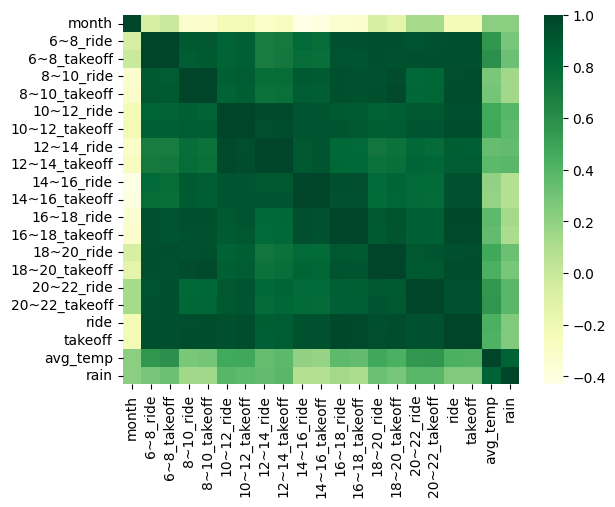

In [40]:
#상관계수 히트맵 생성
corr_df1=round(train_corr.corr(),3)
sns.heatmap(corr_df1, annot=False, cmap='YlGn')

<Axes: >

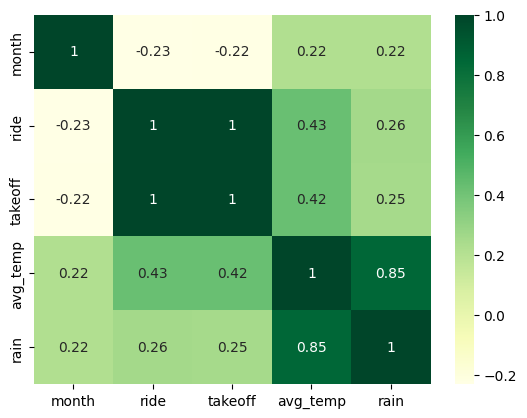

In [41]:
#상관계수 히트맵 생성
train_corr_1 = train_corr[['month', 'ride', 'takeoff', 'avg_temp', 'rain']]
corr_df2=round(train_corr_1.corr(),3)
sns.heatmap(corr_df2, annot=True, cmap='YlGn')

기존의 결과보단 오히려 더 관련이 있을 수 있겠다는 생각이 듭니다! 0.5정도긴하지만.. 그리고 왜 ride와 takeoff가 상관관계가 1인지가..?

In [42]:
train_corr_1

,month,ride,takeoff,avg_temp,rain
0,202209,122170735,118680177,22.4,201.5
1,202210,125228000,121665838,14.6,124.1
2,202211,125181899,121739038,10.0,84.5
3,202212,127027677,123496891,-2.8,13.6
4,202301,111188026,108294511,-1.5,47.9
5,202302,110813253,107914177,2.3,1.0
6,202303,129222176,125752477,9.8,10.5
7,202304,123410937,120016693,13.8,96.9
8,202305,126471540,122978042,19.5,155.6
9,202306,124843781,121407408,23.4,195.6


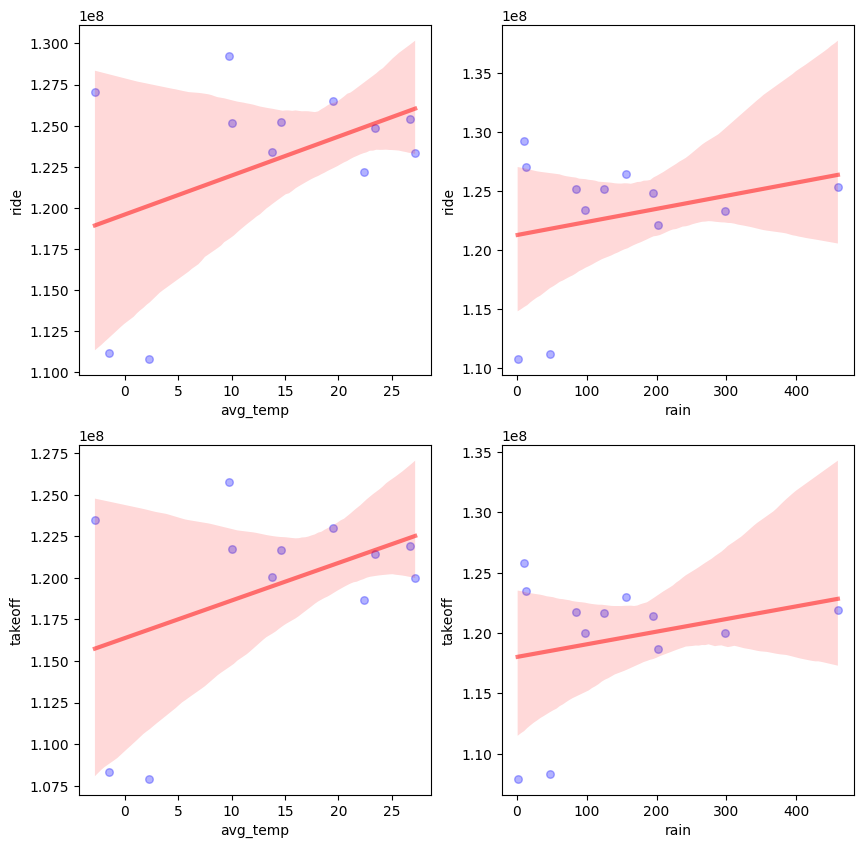

In [43]:
fig, axs = plt.subplots(figsize = (10, 10), nrows=2, ncols=2)
columns_graph = ['avg_temp', 'rain']

for i , feature in enumerate(columns_graph):
    row = int(i/2)
    col = i%2
    plt.xlabel(feature)
    sns.regplot(x=feature , y='ride',data=train_corr_1, ax=axs[row][col],
                scatter_kws={"fc":"b", "ec":"b", "s":30, "alpha":0.3}, color="r", line_kws={"lw":3,"alpha":0.5})

for i , feature in enumerate(columns_graph):
    row = int(i/2) + 1
    col = i%2
    plt.xlabel(feature)
    sns.regplot(x=feature , y='takeoff',data=train_corr_1, ax=axs[row][col],
                scatter_kws={"fc":"b", "ec":"b", "s":30, "alpha":0.3}, color="r", line_kws={"lw":3,"alpha":0.5})

takeoff와 ride 사이의 차이는 정말 너무 작고, 전반적으로 온도가 낮을수록 승하차 인원이 적은 것을 볼 순 있다. 그렇지만... 기온이 낮은 4개 달 중 2달은 승하차인원이 적은 반면 나머지 둘은 많다.(대체 왜????) 강수량은 차이가 기온에 비해 뚜렷해보이진 않으나 유사한 추세로 보인다.

In [44]:
train_corr2 = train
train_corr2['ride'] = 0
train_corr2['takeoff'] = 0
for i in col_list:
  if i[-4:] == 'ride':
    train_corr2['ride'] = train_corr2['ride'] + train_corr2[i]
  else:
    train_corr2['takeoff'] = train_corr2['takeoff'] + train_corr2[i]
train_corr2

,month,bus_id,station_name,bus_station_id,bus_type,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,...,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff,ride,takeoff
0,202209,741,종로2가사거리(00077),00077,서울간선버스,654,354,809,753,576,...,643,763,651,991,758,1016,564,373,5229,5819
1,202209,470,종로2가사거리(00067),00067,서울간선버스,788,325,1265,782,1217,...,839,803,731,950,767,903,669,354,7350,5795
4,202209,100,창경궁.서울대학교병원(00031),00031,서울간선버스,227,708,677,1114,282,...,381,353,558,209,374,146,290,59,2982,3543
5,202209,107,창경궁.서울대학교병원(00058),00058,서울간선버스,89,653,171,1070,101,...,92,159,96,92,130,62,36,30,791,2585
6,202209,104,창경궁.서울대학교병원(00024),00024,서울간선버스,376,1064,759,1765,381,...,344,451,464,228,393,148,251,116,3280,4741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,서울간선버스,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2
498172,202308,9404,구미동차고지(기점가상)(00001),00001,서울광역버스,2,7,2,0,0,...,1,1,1,3,2,0,3,5,12,18
498173,202308,9404,구미동차고지(종점가상)(00060),00060,서울광역버스,0,1,0,3,0,...,0,5,0,3,0,8,0,3,0,26
498174,202308,9707,가좌동종점(종점가상)(00078),00078,서울광역버스,0,2,0,11,0,...,0,2,0,11,0,9,0,7,0,52


In [46]:
train_corr2 = pd.merge(train_corr2,weather_temp, how='inner',on='month')
train_corr2 = pd.merge(train_corr2,weather_rain, how='inner',on='month')
train_corr3 = train_corr2[['ride', 'takeoff', 'avg_temp', 'rain', 'bus_type']]
train_corr3

,ride,takeoff,avg_temp,rain,bus_type
0,5229,5819,22.4,201.5,서울간선버스
1,7350,5795,22.4,201.5,서울간선버스
2,2982,3543,22.4,201.5,서울간선버스
3,791,2585,22.4,201.5,서울간선버스
4,3280,4741,22.4,201.5,서울간선버스
...,...,...,...,...,...
450525,0,2,27.2,298.1,서울간선버스
450526,12,18,27.2,298.1,서울광역버스
450527,0,26,27.2,298.1,서울광역버스
450528,0,52,27.2,298.1,서울광역버스


In [ ]:
sns.pairplot(train_corr3, kind = 'scatter', hue = 'bus_type')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabor

Error in callback <function _draw_all_if_interactive at 0x7db8594fae60> (for post_execute):


KeyboardInterrupt: 

# 5. Scaler 적용 및 인코딩

In [63]:
#패키지 불러오기
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score

import lightgbm
from lightgbm import LGBMRegressor, early_stopping
print(lightgbm.__version__)

import hyperopt #하이퍼 파라미터 튜닝을 베이지안 하이퍼 파라미터 튜닝으로 하면 시간 절약이 될 것 같아 우선 이걸로 해봤습니다!
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
print(hyperopt.__version__)

4.1.0
0.2.7


In [47]:
#타겟 변수 분리
X = train_weather.drop(labels=['18~20_ride', '20~22_ride', '18~20_takeoff', '20~22_takeoff', 'station_name', 'bus_id'],axis=1)
y = train_weather['18~20_ride']

제가 새벽에 하면서 한 생각인데, 저희가 퇴근시간 예측을 한다는 건 퇴근 시간 이전의 승차 데이터를 기반으로 해서 예측하는 거니까... 퇴근 시간 뒤에 있는 애들도 떼야할 거 같아서... 우선 제 임의지만 뗐습니다...

## 5-1. Minmax Scaler

In [48]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450530 entries, 0 to 450529
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           450530 non-null  int64  
 1   bus_id          450530 non-null  object 
 2   station_name    450530 non-null  object 
 3   bus_station_id  450530 non-null  object 
 4   bus_type        450530 non-null  object 
 5   6~8_ride        450530 non-null  int64  
 6   6~8_takeoff     450530 non-null  int64  
 7   8~10_ride       450530 non-null  int64  
 8   8~10_takeoff    450530 non-null  int64  
 9   10~12_ride      450530 non-null  int64  
 10  10~12_takeoff   450530 non-null  int64  
 11  12~14_ride      450530 non-null  int64  
 12  12~14_takeoff   450530 non-null  int64  
 13  14~16_ride      450530 non-null  int64  
 14  14~16_takeoff   450530 non-null  int64  
 15  16~18_ride      450530 non-null  int64  
 16  16~18_takeoff   450530 non-null  int64  
 17  18~20_ride

In [49]:
transformer = MinMaxScaler()
X_minmax = transformer.fit_transform(X[['month', 'bus_station_id',
                                         '6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride',
                                         '16~18_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff',
                                         '12~14_takeoff', '14~16_takeoff', '16~18_takeoff']])
X_minmax_scaled = X
X_minmax_scaled[['month', 'bus_station_id',
                                         '6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride',
                                         '16~18_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff',
                                         '12~14_takeoff', '14~16_takeoff', '16~18_takeoff']] = X_minmax

In [50]:
encoder = OneHotEncoder()
X_minmax_encoded = encoder.fit_transform(X_minmax_scaled[['bus_type']])
#df_ohe = pd.DataFrame(X.toarray(), columns=encoder.get_feature_names())
X_minmax_encoded

<450530x5 sparse matrix of type '<class 'numpy.float64'>'
	with 450530 stored elements in Compressed Sparse Row format>

In [51]:
df_ex = pd.DataFrame(X_minmax_encoded.toarray())
df_ex

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
450525,1.0,0.0,0.0,0.0,0.0
450526,0.0,1.0,0.0,0.0,0.0
450527,0.0,1.0,0.0,0.0,0.0
450528,0.0,1.0,0.0,0.0,0.0


In [52]:
X_scaled1 = pd.concat([X_minmax_scaled, pd.DataFrame(X_minmax_encoded.toarray())], axis = 1)
X_scaled1 = X_scaled1.drop(['bus_type'], axis = 1)
X_scaled1

,month,bus_station_id,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,10~12_takeoff,12~14_ride,12~14_takeoff,...,14~16_takeoff,16~18_ride,16~18_takeoff,avg_temp,rain,0,1,2,3,4
0,0.0,0.076152,0.046206,0.019893,0.022617,0.027561,0.022381,0.038782,0.028438,0.059827,...,0.051273,0.027805,0.044068,22.4,201.5,1.0,0.0,0.0,0.0,0.0
1,0.0,0.066132,0.055673,0.018264,0.035365,0.028623,0.047288,0.035100,0.053210,0.073437,...,0.053961,0.031222,0.042245,22.4,201.5,1.0,0.0,0.0,0.0,0.0
2,0.0,0.030060,0.016038,0.039786,0.018926,0.040774,0.010957,0.025417,0.009562,0.033652,...,0.023722,0.023833,0.009294,22.4,201.5,1.0,0.0,0.0,0.0,0.0
3,0.0,0.057114,0.006288,0.036696,0.004781,0.039164,0.003924,0.014474,0.003765,0.017350,...,0.010685,0.004100,0.004091,22.4,201.5,1.0,0.0,0.0,0.0,0.0
4,0.0,0.023046,0.026565,0.059792,0.021219,0.064602,0.014804,0.025669,0.015458,0.034400,...,0.030307,0.019818,0.010139,22.4,201.5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450525,1.0,0.080160,0.000000,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000044,27.2,298.1,1.0,0.0,0.0,0.0,0.0
450526,1.0,0.000000,0.000141,0.000393,0.000056,0.000000,0.000000,0.000050,0.000050,0.000075,...,0.000067,0.000043,0.000133,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450527,1.0,0.059118,0.000000,0.000056,0.000000,0.000110,0.000000,0.000050,0.000000,0.000150,...,0.000336,0.000000,0.000133,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450528,1.0,0.077154,0.000000,0.000112,0.000000,0.000403,0.000000,0.000151,0.000000,0.000523,...,0.000134,0.000000,0.000489,27.2,298.1,0.0,1.0,0.0,0.0,0.0


## 5-2. Standard Scaler

In [53]:
transformer = StandardScaler()
X_standard = transformer.fit_transform(X[['month', 'bus_station_id',
                                         '6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride',
                                         '16~18_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff',
                                         '12~14_takeoff', '14~16_takeoff', '16~18_takeoff']])
X_standard_scaled = X
X_standard_scaled[['month', 'bus_station_id',
                                         '6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride',
                                         '16~18_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff',
                                         '12~14_takeoff', '14~16_takeoff', '16~18_takeoff']] = X_standard

In [54]:
encoder = OneHotEncoder()
X_standard_encoded = encoder.fit_transform(X_standard_scaled[['bus_type']])
#df_ohe = pd.DataFrame(X.toarray(), columns=encoder.get_feature_names())

In [55]:
X_scaled2 = pd.concat([X_standard_scaled, pd.DataFrame(X_standard_encoded.toarray())], axis = 1)
X_scaled2 = X_scaled2.drop(['bus_type'], axis = 1)
X_scaled2

,month,bus_station_id,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,10~12_takeoff,12~14_ride,12~14_takeoff,...,14~16_takeoff,16~18_ride,16~18_takeoff,avg_temp,rain,0,1,2,3,4
0,-1.453191,1.227034,0.647826,0.120906,0.426289,0.271949,0.572253,0.930642,0.448661,0.961547,...,0.818119,0.206509,0.873996,22.4,201.5,1.0,0.0,0.0,0.0,0.0
1,-1.453191,0.892165,0.923283,0.070051,1.069386,0.306003,2.058066,0.777586,1.523664,1.353058,...,0.904012,0.320218,0.803947,22.4,201.5,1.0,0.0,0.0,0.0,0.0
2,-1.453191,-0.313361,-0.229934,0.741696,0.240130,0.695862,-0.109228,0.375028,-0.370492,0.208641,...,-0.062276,0.074322,-0.462063,22.4,201.5,1.0,0.0,0.0,0.0,0.0
3,-1.453191,0.590783,-0.513613,0.645246,-0.473481,0.644194,-0.528778,-0.079946,-0.622042,-0.260312,...,-0.478854,-0.582348,-0.661959,22.4,201.5,1.0,0.0,0.0,0.0,0.0
4,-1.453191,-0.547769,0.076357,1.365993,0.355774,1.460315,0.120251,0.385512,-0.114641,0.230152,...,0.148160,-0.059286,-0.429601,22.4,201.5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450525,0.781827,1.360981,-0.696566,-0.499883,-0.714642,-0.611106,-0.762892,-0.681685,-0.785443,-0.759382,...,-0.820275,-0.718799,-0.817434,27.2,298.1,1.0,0.0,0.0,0.0,0.0
450526,0.781827,-1.317967,-0.692455,-0.487608,-0.711822,-0.612280,-0.762892,-0.679589,-0.783293,-0.757231,...,-0.818128,-0.717377,-0.814017,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450527,0.781827,0.657757,-0.696566,-0.498130,-0.714642,-0.608757,-0.762892,-0.679589,-0.785443,-0.755079,...,-0.809539,-0.718799,-0.814017,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450528,0.781827,1.260520,-0.696566,-0.496376,-0.714642,-0.599363,-0.762892,-0.675395,-0.785443,-0.744324,...,-0.815981,-0.718799,-0.800349,27.2,298.1,0.0,1.0,0.0,0.0,0.0


# 6. Linear Regression 적용 모델

In [56]:
X_scaled1.columns

Index([         'month', 'bus_station_id',       '6~8_ride',    '6~8_takeoff',
            '8~10_ride',   '8~10_takeoff',     '10~12_ride',  '10~12_takeoff',
           '12~14_ride',  '12~14_takeoff',     '14~16_ride',  '14~16_takeoff',
           '16~18_ride',  '16~18_takeoff',       'avg_temp',           'rain',
                      0,                1,                2,                3,
                      4],
      dtype='object')

In [57]:
X_scaled1.columns = ['month', 'bus_station_id',       '6~8_ride',    '6~8_takeoff',
            '8~10_ride',   '8~10_takeoff',     '10~12_ride',  '10~12_takeoff',
           '12~14_ride',  '12~14_takeoff',     '14~16_ride',  '14~16_takeoff',
           '16~18_ride',  '16~18_takeoff',       'avg_temp',           'rain', 'btype1', 'btype2', 'btype3', 'btype4', 'btype5']
X_scaled1

,month,bus_station_id,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,10~12_takeoff,12~14_ride,12~14_takeoff,...,14~16_takeoff,16~18_ride,16~18_takeoff,avg_temp,rain,btype1,btype2,btype3,btype4,btype5
0,0.0,0.076152,0.046206,0.019893,0.022617,0.027561,0.022381,0.038782,0.028438,0.059827,...,0.051273,0.027805,0.044068,22.4,201.5,1.0,0.0,0.0,0.0,0.0
1,0.0,0.066132,0.055673,0.018264,0.035365,0.028623,0.047288,0.035100,0.053210,0.073437,...,0.053961,0.031222,0.042245,22.4,201.5,1.0,0.0,0.0,0.0,0.0
2,0.0,0.030060,0.016038,0.039786,0.018926,0.040774,0.010957,0.025417,0.009562,0.033652,...,0.023722,0.023833,0.009294,22.4,201.5,1.0,0.0,0.0,0.0,0.0
3,0.0,0.057114,0.006288,0.036696,0.004781,0.039164,0.003924,0.014474,0.003765,0.017350,...,0.010685,0.004100,0.004091,22.4,201.5,1.0,0.0,0.0,0.0,0.0
4,0.0,0.023046,0.026565,0.059792,0.021219,0.064602,0.014804,0.025669,0.015458,0.034400,...,0.030307,0.019818,0.010139,22.4,201.5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450525,1.0,0.080160,0.000000,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000044,27.2,298.1,1.0,0.0,0.0,0.0,0.0
450526,1.0,0.000000,0.000141,0.000393,0.000056,0.000000,0.000000,0.000050,0.000050,0.000075,...,0.000067,0.000043,0.000133,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450527,1.0,0.059118,0.000000,0.000056,0.000000,0.000110,0.000000,0.000050,0.000000,0.000150,...,0.000336,0.000000,0.000133,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450528,1.0,0.077154,0.000000,0.000112,0.000000,0.000403,0.000000,0.000151,0.000000,0.000523,...,0.000134,0.000000,0.000489,27.2,298.1,0.0,1.0,0.0,0.0,0.0


In [58]:
X_scaled2.columns = ['month', 'bus_station_id',       '6~8_ride',    '6~8_takeoff',
            '8~10_ride',   '8~10_takeoff',     '10~12_ride',  '10~12_takeoff',
           '12~14_ride',  '12~14_takeoff',     '14~16_ride',  '14~16_takeoff',
           '16~18_ride',  '16~18_takeoff',       'avg_temp',           'rain', 'btype1', 'btype2', 'btype3', 'btype4', 'btype5']
X_scaled2

,month,bus_station_id,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,10~12_takeoff,12~14_ride,12~14_takeoff,...,14~16_takeoff,16~18_ride,16~18_takeoff,avg_temp,rain,btype1,btype2,btype3,btype4,btype5
0,-1.453191,1.227034,0.647826,0.120906,0.426289,0.271949,0.572253,0.930642,0.448661,0.961547,...,0.818119,0.206509,0.873996,22.4,201.5,1.0,0.0,0.0,0.0,0.0
1,-1.453191,0.892165,0.923283,0.070051,1.069386,0.306003,2.058066,0.777586,1.523664,1.353058,...,0.904012,0.320218,0.803947,22.4,201.5,1.0,0.0,0.0,0.0,0.0
2,-1.453191,-0.313361,-0.229934,0.741696,0.240130,0.695862,-0.109228,0.375028,-0.370492,0.208641,...,-0.062276,0.074322,-0.462063,22.4,201.5,1.0,0.0,0.0,0.0,0.0
3,-1.453191,0.590783,-0.513613,0.645246,-0.473481,0.644194,-0.528778,-0.079946,-0.622042,-0.260312,...,-0.478854,-0.582348,-0.661959,22.4,201.5,1.0,0.0,0.0,0.0,0.0
4,-1.453191,-0.547769,0.076357,1.365993,0.355774,1.460315,0.120251,0.385512,-0.114641,0.230152,...,0.148160,-0.059286,-0.429601,22.4,201.5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450525,0.781827,1.360981,-0.696566,-0.499883,-0.714642,-0.611106,-0.762892,-0.681685,-0.785443,-0.759382,...,-0.820275,-0.718799,-0.817434,27.2,298.1,1.0,0.0,0.0,0.0,0.0
450526,0.781827,-1.317967,-0.692455,-0.487608,-0.711822,-0.612280,-0.762892,-0.679589,-0.783293,-0.757231,...,-0.818128,-0.717377,-0.814017,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450527,0.781827,0.657757,-0.696566,-0.498130,-0.714642,-0.608757,-0.762892,-0.679589,-0.785443,-0.755079,...,-0.809539,-0.718799,-0.814017,27.2,298.1,0.0,1.0,0.0,0.0,0.0
450528,0.781827,1.260520,-0.696566,-0.496376,-0.714642,-0.599363,-0.762892,-0.675395,-0.785443,-0.744324,...,-0.815981,-0.718799,-0.800349,27.2,298.1,0.0,1.0,0.0,0.0,0.0


## 6-1. Minmax

In [59]:
lr = LinearRegression()

lr.fit(X_scaled1 ,y)

y_preds1 = lr.predict(X_scaled1)

mse1 = mean_squared_error(y, y_preds1)
rmse1 = np.sqrt(mse1)

print('Minmax 스케일러를 적용한 경우의 평가')
print('MSE : {0:.3f}    RMSE : {1:.3F}'.format(mse1 , rmse1))
print()
print('R2 score : {0:.3f}'.format(r2_score(y, y_preds1)))
print('절편 :', lr.intercept_)
print('회귀 계수 :', lr.coef_)

Minmax 스케일러를 적용한 경우의 평가
MSE : 82303.336    RMSE : 286.886

R2 score : 0.886
절편 : -92.18398625671671
회귀 계수 : [ 2.63976744e+01  4.80170886e+02 -3.03364386e+03  2.66114139e+03
  8.70296509e+03  6.86612305e+02 -1.44972942e+04 -2.78622295e+03
  7.74790695e+03 -1.53463962e+03 -5.18476181e+03  2.68858553e+02
  3.08950103e+04  1.60519299e+03 -1.84883888e+00  1.27153391e-01
 -1.13516974e+01  5.90386915e+01  4.25768983e+01 -1.14719039e+02
  2.44551464e+01]


## 6-2. Standard

In [60]:
lr = LinearRegression()

lr.fit(X_scaled2 ,y)

y_preds2 = lr.predict(X_scaled2)

mse2 = mean_squared_error(y, y_preds2)
rmse2 = np.sqrt(mse2)

print('Standard 스케일러를 적용한 경우의 평가')
print('MSE : {0:.3f}    RMSE : {1:.3F}'.format(mse2 , rmse2))
print()
print('R2 score : {0:.3f}'.format(r2_score(y, y_preds2)))
print('절편 :', lr.intercept_)
print('회귀 계수 :', lr.coef_)

Standard 스케일러를 적용한 경우의 평가
MSE : 82303.336    RMSE : 286.886

R2 score : 0.886
절편 : 499.6162007968114
회귀 계수 : [ 1.18109457e+01  1.43678234e+01 -1.04264686e+02  8.52763843e+01
  1.72519077e+02  2.14015497e+01 -2.43018769e+02 -6.70175159e+01
  1.78540815e+02 -5.33503354e+01 -1.68012709e+02  8.41390855e+00
  9.28380453e+02  4.17789451e+01 -1.84883888e+00  1.27153391e-01
 -1.13516974e+01  5.90386915e+01  4.25768983e+01 -1.14719039e+02
  2.44551464e+01]


대체 왜 결과가 같죠?? 회귀 계수는 다르니까 각각 잘 돌아간 건 맞는데 왜 점수가 다 같은지...

# 7. LGBM 적용 모델

## 7-1. 기본 LGBM에 Minmax 적용 데이터

In [61]:
lgbm = LGBMRegressor(n_jobs=-1)
lgbm.fit(X_scaled1 ,y)

print('Train Score : {}'.format(lgbm.score(X_scaled1 ,y)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3270
[LightGBM] [Info] Number of data points in the train set: 450530, number of used features: 21
[LightGBM] [Info] Start training from score 508.554196
Train Score : 0.9383132905016077


## 7-2. 기본 LGBM에 Standard 적용 데이터

In [62]:
lgbm = LGBMRegressor(n_jobs=-1)
lgbm.fit(X_scaled2 ,y)

print('Train Score : {}'.format(lgbm.score(X_scaled2 ,y)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 450530, number of used features: 21
[LightGBM] [Info] Start training from score 508.554196
Train Score : 0.9369201011015459


## 7-3. hyper optimization 적용 후 LGBM, Minmax

In [67]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
lgb_reg_params = {
    'learning_rate':    hp.uniform('learning_rate',0.1,1),
    'max_depth':        hp.choice('max_depth',        np.arange(2, 100, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 50, 1, dtype=int)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.4,1),
    'subsample':        hp.uniform('subsample', 0.6, 1),
    'num_leaves':       hp.choice('num_leaves',       np.arange(1, 200, 1, dtype=int)),
    'min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'reg_alpha':        hp.uniform('reg_alpha',0,1),
    'reg_lambda':       hp.uniform('reg_lambda',0,1),
    'n_estimators':     hp.choice('n_estimators',        np.arange(100, 500, 10, dtype=int))
}
def f(params):
  lgbm = LGBMRegressor(n_jobs=-1,early_stopping_rounds=None,**params)
  score = cross_val_score(lgbm, X_scaled1, y, cv=2,scoring='r2',n_jobs=-1).mean()
  return score
#r2를 기준으로 설정
trials = Trials()
result = fmin(
    fn=f,                           # objective function
    space=lgb_reg_params,   # parameter space
    algo=tpe.suggest,               # surrogate algorithm
    max_evals=50,                  # no. of evaluations
    trials=trials                   # trials object that keeps track of the sample results (optional)
)

print(result)

100%|██████████| 50/50 [25:48<00:00, 30.96s/trial, best loss: 0.8940248131276995]
{'colsample_bytree': 0.49452505544446773, 'learning_rate': 0.9981884254947182, 'max_depth': 93, 'min_child_weight': 30, 'min_split_gain': 0.6612653039815748, 'n_estimators': 28, 'num_leaves': 67, 'reg_alpha': 0.9523462831443161, 'reg_lambda': 0.19733142177678076, 'subsample': 0.8233029671899241}


In [68]:
lgbm_tuned1 = LGBMRegressor(n_jobs=-1,
                            n_estimators=int(result['n_estimators']),
                            learning_rate=round(result['learning_rate'], 5),
                            max_depth=int(result['max_depth']),
                            min_child_weight=int(result['min_child_weight']),
                            colsample_bytree=round(result['colsample_bytree'], 5),
                            subsample = round(result['subsample'], 5),
                            num_leaves =int(result['num_leaves']),
                            min_split_gain = round(result['min_split_gain'], 5),
                            reg_alpha = round(result['reg_alpha'], 5),
                            reg_lambda =round(result['reg_lambda'], 5)
                           )

lgbm_tuned1.fit(X_scaled1 ,y)

y_preds_tuned1 = lgbm_tuned1.predict(X_scaled1)

print('Train Score : {}'.format(lgbm_tuned1.score(X_scaled1 ,y)))

mse_tuned1 = mean_squared_error(y, y_preds_tuned1)
rmse1_tuned1 = np.sqrt(mse_tuned1)

print('Minmax 스케일러를 적용한 경우의 튜닝 후 평가')
print('MSE : {0:.3f}    RMSE : {1:.3F}'.format(mse_tuned1 , rmse1_tuned1))
print()
print('R2 score : {0:.3f}'.format(r2_score(y, y_preds_tuned1)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3270
[LightGBM] [Info] Number of data points in the train set: 450530, number of used features: 21
[LightGBM] [Info] Start training from score 508.554196
Train Score : 0.9461970196384256
Minmax 스케일러를 적용한 경우의 튜닝 후 평가
MSE : 38695.316    RMSE : 196.711

R2 score : 0.946


## 7-4. hyper optimization 적용 후 LGBM, Standard

In [69]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
lgb_reg_params = {
    'learning_rate':    hp.uniform('learning_rate',0.1,1),
    'max_depth':        hp.choice('max_depth',        np.arange(2, 100, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 50, 1, dtype=int)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.4,1),
    'subsample':        hp.uniform('subsample', 0.6, 1),
    'num_leaves':       hp.choice('num_leaves',       np.arange(1, 200, 1, dtype=int)),
    'min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'reg_alpha':        hp.uniform('reg_alpha',0,1),
    'reg_lambda':       hp.uniform('reg_lambda',0,1),
    'n_estimators':     hp.choice('n_estimators',        np.arange(100, 500, 10, dtype=int))
}
def f(params):
  lgbm = LGBMRegressor(n_jobs=-1,early_stopping_rounds=None,**params)
  score = cross_val_score(lgbm, X_scaled2, y, cv=2,scoring='r2',n_jobs=-1).mean()
  return score
#r2를 기준으로 설정
trials = Trials()
result = fmin(
    fn=f,                           # objective function
    space=lgb_reg_params,   # parameter space
    algo=tpe.suggest,               # surrogate algorithm
    max_evals=50,                  # no. of evaluations
    trials=trials                   # trials object that keeps track of the sample results (optional)
)

print(result)

100%|██████████| 50/50 [30:00<00:00, 36.01s/trial, best loss: 0.882920228029532]
{'colsample_bytree': 0.49485052373716815, 'learning_rate': 0.9829020403663601, 'max_depth': 79, 'min_child_weight': 18, 'min_split_gain': 0.023301248210819553, 'n_estimators': 34, 'num_leaves': 193, 'reg_alpha': 0.021441086411531623, 'reg_lambda': 0.6516484591894983, 'subsample': 0.8892200446166059}


In [70]:
lgbm_tuned2 = LGBMRegressor(n_jobs=-1,
                            n_estimators=int(result['n_estimators']),
                            learning_rate=round(result['learning_rate'], 5),
                            max_depth=int(result['max_depth']),
                            min_child_weight=int(result['min_child_weight']),
                            colsample_bytree=round(result['colsample_bytree'], 5),
                            subsample = round(result['subsample'], 5),
                            num_leaves =int(result['num_leaves']),
                            min_split_gain = round(result['min_split_gain'], 5),
                            reg_alpha = round(result['reg_alpha'], 5),
                            reg_lambda =round(result['reg_lambda'], 5)
                           )

lgbm_tuned2.fit(X_scaled2 ,y)

y_preds_tuned2 = lgbm_tuned2.predict(X_scaled2)

print('Train Score : {}'.format(lgbm_tuned2.score(X_scaled2 ,y)))

mse_tuned2 = mean_squared_error(y, y_preds_tuned2)
rmse1_tuned2 = np.sqrt(mse_tuned2)

print('Minmax 스케일러를 적용한 경우의 튜닝 후 평가')
print('MSE : {0:.3f}    RMSE : {1:.3F}'.format(mse_tuned2 , rmse1_tuned2))
print()
print('R2 score : {0:.3f}'.format(r2_score(y, y_preds_tuned2)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 450530, number of used features: 21
[LightGBM] [Info] Start training from score 508.554196
Train Score : 0.9648814509329673
Minmax 스케일러를 적용한 경우의 튜닝 후 평가
MSE : 25257.399    RMSE : 158.926

R2 score : 0.965
